In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


atuona pf
hvide sande dk
ushuaia ar
nikolskoye ru
sharjah ae
lorengau pg
aswan eg
nikolskoye ru
westport nz
ribeira grande pt
hilo us
illoqqortoormiut gl
busselton au
bolshaya martynovka ru
albany au
sioux lookout ca
kodiak us
luderitz na
puerto ayora ec
coquimbo cl
cape town za
kaitangata nz
praya id
luderitz na
yellowknife ca
sentyabrskiy ru
yanam in
leshan cn
rikitea pf
kodiak us
virginia beach us
okhotsk ru
domoni km
sao filipe cv
sitka us
norman wells ca
mount gambier au
punta arenas cl
puerto ayora ec
ensenada mx
cherskiy ru
bereda so
jamestown sh
kantang th
vaini to
deputatskiy ru
gejiu cn
tuktoyaktuk ca
beringovskiy ru
chokurdakh ru
sitka us
busselton au
samusu ws
ushuaia ar
avera pf
cape town za
punta arenas cl
burica pa
los llanos de aridane es
punta arenas cl
ijaki ki
mataura pf
ouadda cf
alpinopolis br
moberly us
umzimvubu za
karpinsk ru
bredasdorp za
saint-philippe re
amderma ru
senta rs
cascas pe
laguna br
illoqqortoormiut gl
kapaa us
bandarbeyla so
port alfred za
punta a

punta arenas cl
yinchuan cn
atuona pf
iqaluit ca
new norfolk au
bluff nz
nikolayevsk-na-amure ru
barentsburg sj
hasaki jp
mataura pf
vaini to
kuah my
cairns au
victoria sc
port alfred za
new norfolk au
sogdiondon ru
nuuk gl
illoqqortoormiut gl
anadyr ru
otane nz
atuona pf
chongoyape pe
barentsburg sj
busselton au
guiyang cn
mataura pf
port elizabeth za
tiznit ma
chuy uy
busselton au
punta arenas cl
bluff nz
saskylakh ru
atuona pf
lalomanu ws
kapaa us
tasiilaq gl
geraldton ca
vasilsursk ru
hobart au
san francisco ar
caravelas br
lavrentiya ru
broome au
ushuaia ar
eenhana na
deep river ca
ushuaia ar
mataura pf
vaini to
safaga eg
grand river south east mu
cape town za
ithaki gr
port hawkesbury ca
illoqqortoormiut gl
tulsa us
ushuaia ar
klaksvik fo
atuona pf
avera pf
laramie us
hithadhoo mv
hermanus za
airai pw
lichtenburg za
lagoa pt
tasiilaq gl
atuona pf
boende cd
longyearbyen sj
hilo us
busselton au
rikitea pf
ushuaia ar
puerto ayora ec
new norfolk au
luderitz na
saskylakh ru
hasaki jp


bose cn
progreso mx
mys shmidta ru
wexford ie
vaini to
hithadhoo mv
mataura pf
dibulla co
bluff nz
saldanha za
bluff nz
lavrentiya ru
nome us
fortuna us
saint george bm
port alfred za
vaitupu wf
mar del plata ar
rikitea pf
illoqqortoormiut gl
mar del plata ar
fallon us
umzimvubu za
twentynine palms us
taolanaro mg
rikitea pf
huarmey pe
mayo ca
vaitupu wf
ranchpar am


In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | hvide sande
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | sharjah
Processing Record 6 of Set 1 | lorengau
Processing Record 7 of Set 1 | aswan
Processing Record 8 of Set 1 | westport
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | bolshaya martynovka
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | sioux lookout
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | kaitangata
Processing Record 22 of Set 1 | 

Processing Record 35 of Set 4 | iskateley
Processing Record 36 of Set 4 | iqaluit
Processing Record 37 of Set 4 | port elizabeth
Processing Record 38 of Set 4 | jaslo
Processing Record 39 of Set 4 | north platte
Processing Record 40 of Set 4 | bonanza
Processing Record 41 of Set 4 | rusape
Processing Record 42 of Set 4 | kondinskoye
Processing Record 43 of Set 4 | rio gallegos
Processing Record 44 of Set 4 | chiang rai
Processing Record 45 of Set 4 | guerrero negro
Processing Record 46 of Set 4 | bairiki
Processing Record 47 of Set 4 | skotterud
Processing Record 48 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 49 of Set 4 | akdepe
Processing Record 50 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 1 of Set 5 | tuni
Processing Record 2 of Set 5 | bolobo
Processing Record 3 of Set 5 | qasigiannguit
Processing Record 4 of Set 5 | sawakin
Processing Record 5 of Set 5 | lata
Processing Record 6 of Set 5 | saint-francois
Processing Record 7 of Se

Processing Record 30 of Set 8 | zemio
Processing Record 31 of Set 8 | chengde
Processing Record 32 of Set 8 | campos altos
Processing Record 33 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 34 of Set 8 | dunmore east
Processing Record 35 of Set 8 | olafsvik
Processing Record 36 of Set 8 | russell
Processing Record 37 of Set 8 | harper
Processing Record 38 of Set 8 | shirokiy
Processing Record 39 of Set 8 | amapa
Processing Record 40 of Set 8 | sicuani
Processing Record 41 of Set 8 | demyanovo
Processing Record 42 of Set 8 | yinchuan
Processing Record 43 of Set 8 | nikolayevsk-na-amure
Processing Record 44 of Set 8 | hasaki
Processing Record 45 of Set 8 | kuah
Processing Record 46 of Set 8 | cairns
Processing Record 47 of Set 8 | sogdiondon
City not found. Skipping...
Processing Record 48 of Set 8 | nuuk
Processing Record 49 of Set 8 | anadyr
Processing Record 50 of Set 8 | chongoyape
Processing Record 1 of Set 9 | guiyang
Processing Record 2 of Set 9 | tiznit
Proc

Processing Record 19 of Set 12 | maragogi
Processing Record 20 of Set 12 | manacapuru
Processing Record 21 of Set 12 | college
Processing Record 22 of Set 12 | praia da vitoria
Processing Record 23 of Set 12 | tura
Processing Record 24 of Set 12 | kirakira
Processing Record 25 of Set 12 | kyaukse
Processing Record 26 of Set 12 | visnes
Processing Record 27 of Set 12 | sao joao da barra
Processing Record 28 of Set 12 | barbar
City not found. Skipping...
Processing Record 29 of Set 12 | galgani
City not found. Skipping...
Processing Record 30 of Set 12 | talnakh
Processing Record 31 of Set 12 | san pedro
Processing Record 32 of Set 12 | naron
Processing Record 33 of Set 12 | dabakala
Processing Record 34 of Set 12 | muisne
Processing Record 35 of Set 12 | kardamaina
Processing Record 36 of Set 12 | oda
Processing Record 37 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 38 of Set 12 | wad madani
Processing Record 39 of Set 12 | srednekolymsk
Processing Record 40 of S

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.40,75,38,26.11,PF,2021-07-20 23:03:29
1,Hvide Sande,56.0045,8.1294,60.01,78,72,21.00,DK,2021-07-20 23:03:29
2,Ushuaia,-54.8000,-68.3000,33.46,64,75,12.66,AR,2021-07-20 22:58:50
3,Nikolskoye,59.7035,30.7861,59.02,96,91,5.73,RU,2021-07-20 22:58:54
4,Sharjah,25.3573,55.4033,97.25,51,83,13.15,AE,2021-07-20 23:03:30
5,Lorengau,-2.0226,147.2712,81.95,75,100,2.15,PG,2021-07-20 23:03:30
6,Aswan,24.0934,32.9070,95.63,15,51,13.82,EG,2021-07-20 23:03:31
7,Westport,41.1415,-73.3579,85.01,77,1,1.99,US,2021-07-20 23:03:31
8,Ribeira Grande,38.5167,-28.7000,68.72,87,22,14.25,PT,2021-07-20 23:03:31
9,Hilo,19.7297,-155.0900,79.25,83,87,1.99,US,2021-07-20 23:02:03


In [29]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,38,PF,2021-07-20 23:03:29,75,-9.8000,-139.0333,77.40,26.11
1,Hvide Sande,72,DK,2021-07-20 23:03:29,78,56.0045,8.1294,60.01,21.00
2,Ushuaia,75,AR,2021-07-20 22:58:50,64,-54.8000,-68.3000,33.46,12.66
3,Nikolskoye,91,RU,2021-07-20 22:58:54,96,59.7035,30.7861,59.02,5.73
4,Sharjah,83,AE,2021-07-20 23:03:30,51,25.3573,55.4033,97.25,13.15
...,...,...,...,...,...,...,...,...,...
556,Fallon,75,US,2021-07-20 23:07:00,17,39.4735,-118.7774,94.91,4.61
557,Twentynine Palms,87,US,2021-07-20 23:07:01,21,34.1356,-116.0542,105.94,8.16
558,Huarmey,32,PE,2021-07-20 23:07:01,76,-10.0681,-78.1522,66.56,8.03
559,Mayo,20,US,2021-07-20 23:07:01,70,38.8876,-76.5119,91.24,1.01


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

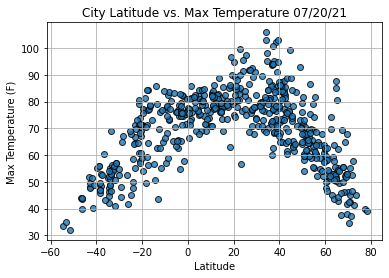

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

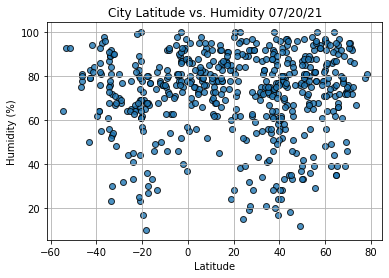

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

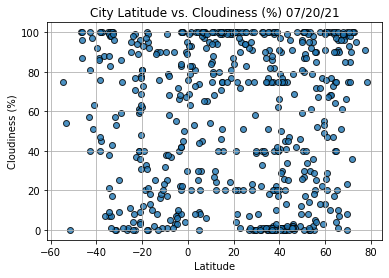

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

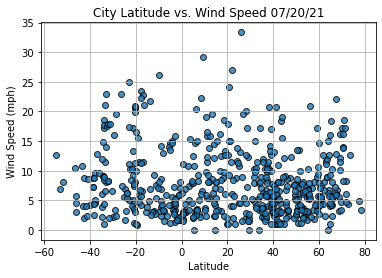

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()